# Forest Plot

> Explanation of how to use forest_plot for contrast objects e.g delta-delta and mini-meta.

- order: 7

Since v2024.03.29, DABEST supports the comparison and analysis of different delta-delta analysis through a function called "forest_plot". 

Many experimental designs investigate the effects of two interacting independent variables on a dependent variable. The delta-delta effect size enables us distill the net effect of the two variables. 


Consider 3 experiments where in each of the experiment we test the efficacy of 3 drugs named ``Drug1``, ``Drug2`` , and ``Drug3`` on a disease-causing mutation M based on disease metric Y. The greater the value Y has, the more severe the disease phenotype is. Phenotype Y has been shown to be caused by a gain-of-function mutation M, so we expect a difference between wild type (W) subjects and mutant subjects (M). Now, we want to know whether this effect is ameliorated by the administration of Drug treatment. We also administer a placebo as a control. In theory, we only expect Drug to have an effect on the M group, although in practice, many drugs have non-specific effects on healthy populations too.

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug1  | X<sub>D, W</sub> | X<sub>D, M</sub> |
| Placebo | X<sub>P, W</sub> | X<sub>P, M</sub> |

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug2  | X<sub>D, W</sub> | X<sub>D, M</sub> |
| Placebo | X<sub>P, W</sub> | X<sub>P, M</sub> |

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug3  | X<sub>D, W</sub> | X<sub>D, M</sub> |
| Placebo | X<sub>P, W</sub> | X<sub>P, M</sub> |

There are two ``Treatment`` conditions, ``Placebo`` (control group) and ``Drug`` (test group). There are two ``Genotype``\s: ``W`` (wild type population) and ``M`` (mutant population). Additionally, each experiment was conducted twice (``Rep1`` and ``Rep2``). We will perform several analyses to visualise these differences in a simulated dataset. 

## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest
from dabest.forest_plot import forest_plot
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import dabest 
print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2024.03.29


## Simulate datasets for the contrast objects

In [ ]:

from scipy.stats import norm

def create_delta_dataset(N=20, 
                        seed=9999, 
                        second_quarter_adjustment=3, 
                        third_quarter_adjustment=-0.1):
    np.random.seed(seed)  # Set the seed for reproducibility

    # Create samples
    y = norm.rvs(loc=3, scale=0.4, size=N*4)
    y[N:2*N] += second_quarter_adjustment
    y[2*N:3*N] += third_quarter_adjustment

    # Treatment, Rep, Genotype, and ID columns
    treatment = np.repeat(['Placebo', 'Drug'], N*2).tolist()
    rep = ['Rep1', 'Rep2'] * (N*2)
    genotype = np.repeat(['W', 'M', 'W', 'M'], N).tolist()
    id_col = list(range(0, N*2)) * 2

    # Combine all columns into a DataFrame
    df = pd.DataFrame({
        'ID': id_col,
        'Rep': rep,
        'Genotype': genotype,
        'Treatment': treatment,
        'Y': y
    })

    return df

# Generate the first dataset with a different seed and adjustments
df_delta2_drug1 = create_delta_dataset(seed=9999, second_quarter_adjustment=1, third_quarter_adjustment=-0.5)

# Generate the second dataset with a different seed and adjustments
df_delta2_drug2 = create_delta_dataset(seed=9999, second_quarter_adjustment=0.1, third_quarter_adjustment=-1)

# Generate the third dataset with the same seed as the first but different adjustments
df_delta2_drug3 = create_delta_dataset(seed=9999, second_quarter_adjustment=3, third_quarter_adjustment=-0.1)

### Creating contrast objects required for forest_plot

In [ ]:
unpaired_delta_01 = dabest.load(data = df_delta2_drug1, 
                                x = ["Genotype", "Genotype"], 
                                y = "Y", delta2 = True, 
                                experiment = "Treatment")
unpaired_delta_02 = dabest.load(data = df_delta2_drug2, 
                                x = ["Genotype", "Genotype"], 
                                y = "Y", delta2 = True, 
                                experiment = "Treatment")
unpaired_delta_03 = dabest.load(data = df_delta2_drug3, 
                                x = ["Genotype", "Genotype"], 
                                y = "Y", 
                                delta2 = True, 
                                experiment = "Treatment")
paired_delta_01 = dabest.load(data = df_delta2_drug1, 
                                paired = "baseline", id_col="ID",
                                x = ["Treatment", "Rep"], y = "Y", 
                                delta2 = True, experiment = "Genotype")
paired_delta_02 = dabest.load(data = df_delta2_drug2,
                                paired = "baseline", id_col="ID",
                                x = ["Treatment", "Rep"], y = "Y", 
                                delta2 = True, experiment = "Genotype")
paired_delta_03 = dabest.load(data = df_delta2_drug3,
                                paired = "baseline", id_col="ID",
                                x = ["Treatment", "Rep"], y = "Y", 
                                delta2 = True, experiment = "Genotype")
contrasts = [unpaired_delta_01, unpaired_delta_02, unpaired_delta_03]
paired_contrasts = [paired_delta_01, paired_delta_02, paired_delta_03]

## Visualize the delta delta plots for each datasets 

To create a delta-delta plot, you simply need to set ``delta2=True`` in the 
``dabest.load()`` function and ``mean_diff.plot()``

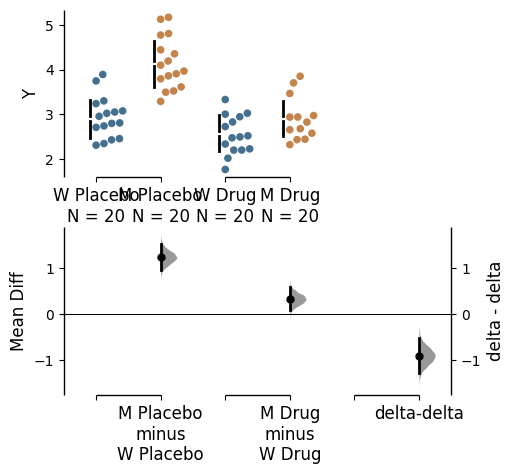

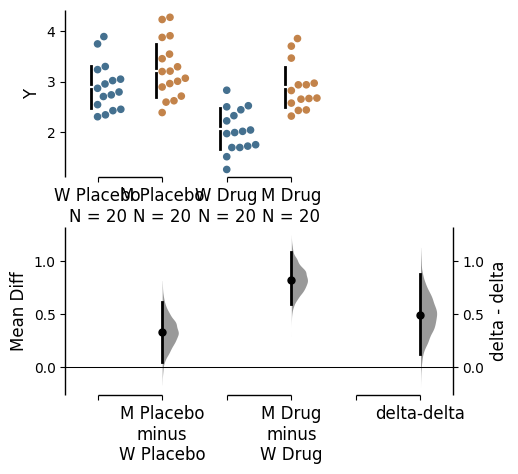

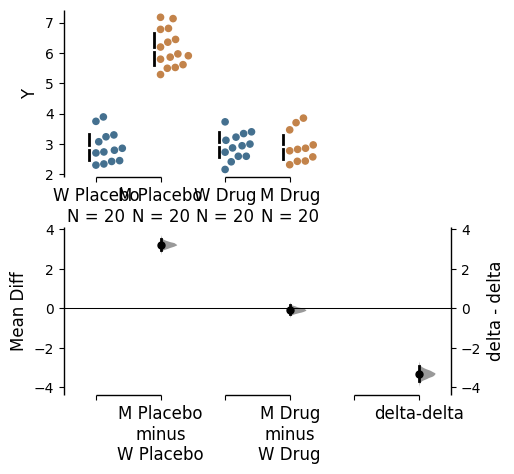

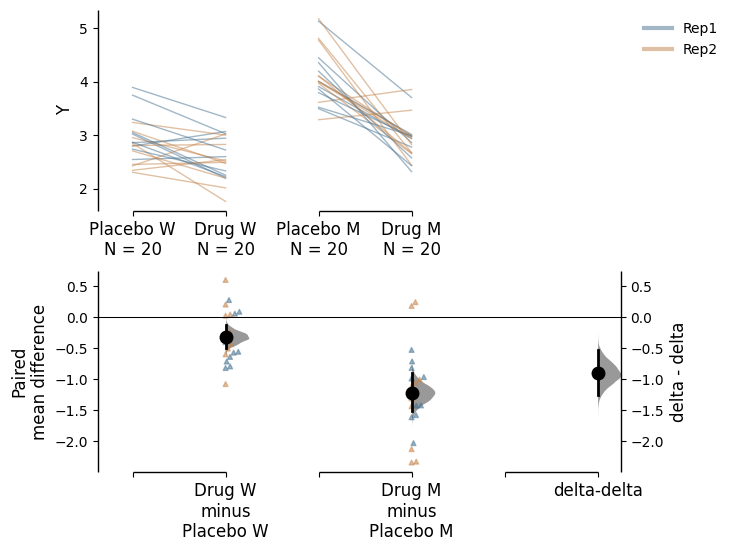

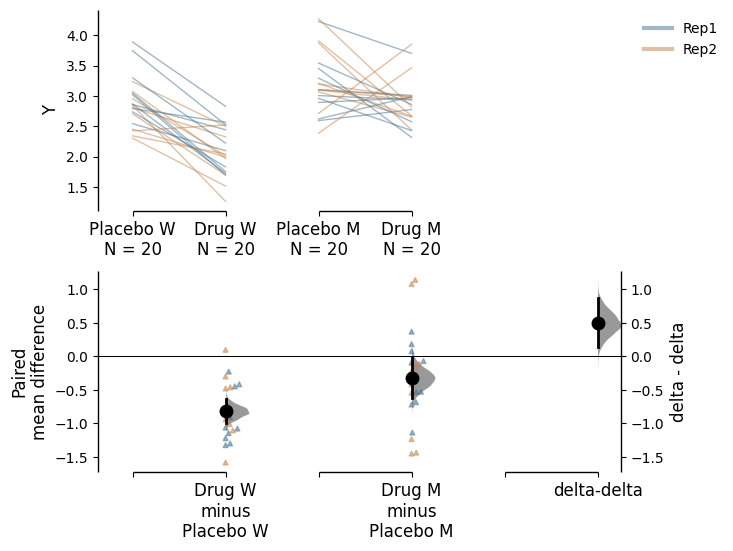

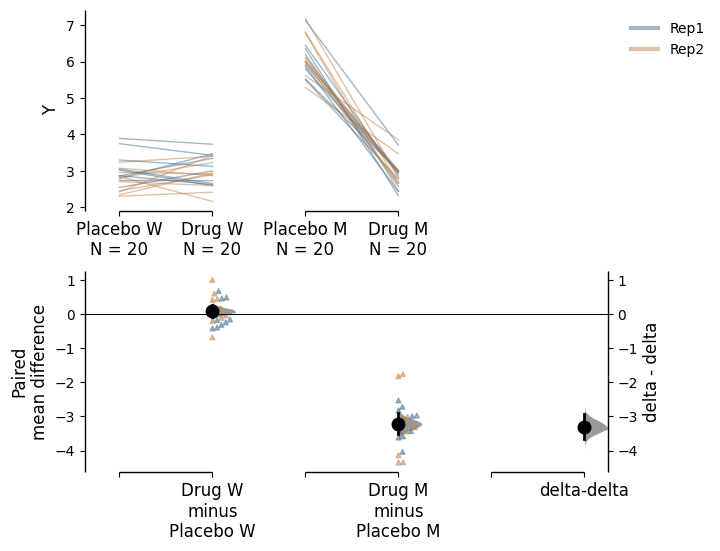

In [ ]:
''' 
In this case,``x`` needs to be declared as a list consisting of 2 elements, unlike most cases where it is a single element. 
The first element in ``x`` will represent the variable plotted along the horizontal axis, and the second one will determine the 
color of dots for scattered plots or the color of lines for slope graphs. We use the ``experiment`` input to specify the grouping of the data.
'''
f1 = unpaired_delta_01.mean_diff.plot(
    contrast_label='Mean Diff',
    fig_size = (5, 5),
    raw_marker_size = 5,
    es_marker_size = 5,
    color_col='Genotype'
);


f2 = unpaired_delta_02.mean_diff.plot(                  
            contrast_label='Mean Diff',
            fig_size = (5, 5),
            raw_marker_size = 5,
            es_marker_size = 5,
            color_col='Genotype'
);


f3 = unpaired_delta_03.mean_diff.plot(                  
                    contrast_label='Mean Diff',
                    fig_size = (5, 5),
                    raw_marker_size = 5,
                    es_marker_size = 5,
                    color_col='Genotype'
);

p1 = paired_delta_01.mean_diff.plot();
p2 = paired_delta_02.mean_diff.plot();
p3 = paired_delta_03.mean_diff.plot();



# Plot all the delta-delta plots into a forest plot 
### For comparisons of differen ``Durg`` effects

Important Inputs:

1. A list of contrast objects 

2. contrast_labels e.g ``['Dug1', 'Drug2', 'Drug3']``

3. title: default is ``"ΔΔ Forest"``

4. y_label: default as ``"value"``, please change it according to your measurement units/ types

5. contrast_type ``delta-delt`` and ``mini-meta`` are supported

6. Which effect size to plot (default is ``delta-delta mean-diff``, but you can specify which effect size you want to use)\n

7. Axes to put the plot into existing figures \n

8. The argument ``horizontal`` is a boolean input (``True``/ ``False``) \n

   default is ``vertical``, (``False``) that changes the default orientation, \n
   
   if ``True`` the delta-delta values will be reflected on the x axis and the delta plots will be plotted horizontally. \n
9. Plot kwargs are supported such as violin plot kwargs, fontsize, marker_size, ci_line_width

output:

- A plot with horizontally/vertically laid out half violin plots of each of the prescribed delta bootstraps. 


#### Vertical (default) Layout

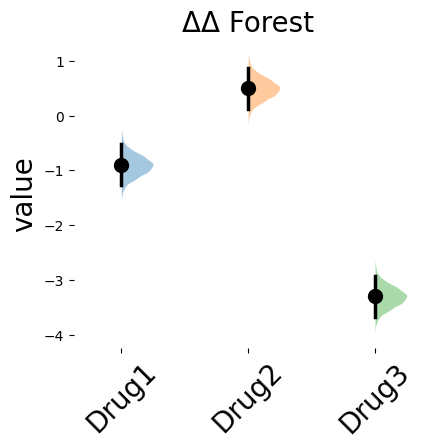

In [ ]:
forest1_vertical = forest_plot(contrasts, 
                               contrast_labels =['Drug1', 'Drug2', 'Drug3']);

#### Horizontal Layout

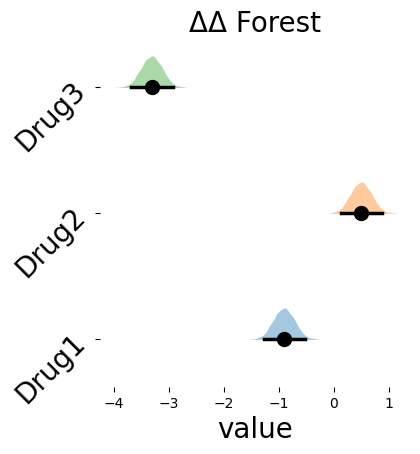

In [ ]:
forest1_horizontal = forest_plot(contrasts, 
                                 contrast_labels =['Drug1', 'Drug2', 'Drug3'],
                                 horizontal=True);


Additiionall, for aesthetics and labels, you can use:

1. The ``custom_palette`` argument to specify the colors you would like to indicate each experiment in a list \n
    e.g ["gray", "blue", "green" ].
    
2. Additionally. the argument ``ylabel`` should be specified to specify the unit or 
    the exact name of the measurement of experiments, for example "delta_deltas", the default is "value"

#### Changing ``custom_palette`` and ``effect_size``

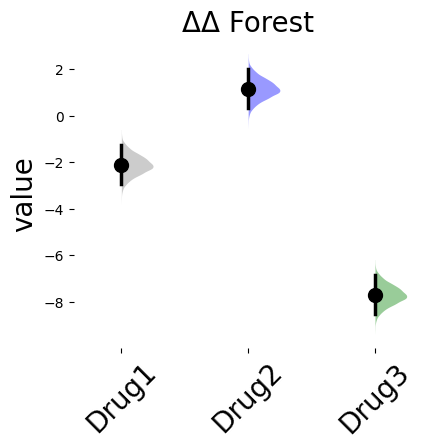

In [ ]:
forest2_vertical = forest_plot(paired_contrasts, 
                               contrast_labels =['Drug1', 'Drug2', 'Drug3'], 
                               custom_palette= ['gray', 'blue', 'green' ], 
                               effect_size='delta_g');

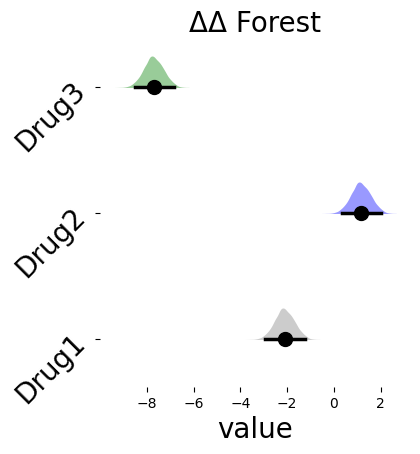

In [ ]:

forest2_horizontal = forest_plot(paired_contrasts, 
                                 contrast_labels =['Drug1', 'Drug2', 'Drug3'], 
                                 custom_palette= ['gray', 'blue', 'green' ],
                                 horizontal=True, effect_size='delta_g');




### Using existing axis "ax" as the optional input to plot forest_plot \n



With other kinds of dabest plots side by side or in other possible orientations, \n

We will specify the x_labels that we want to indicate in a list of strings and parse it as the argument contrast_labels, \n

for example ['Drug1', 'Drug2', 'Drug3'].

### Two forest plots plotted together in one axis

Text(0.5, 1.0, 'Paired')

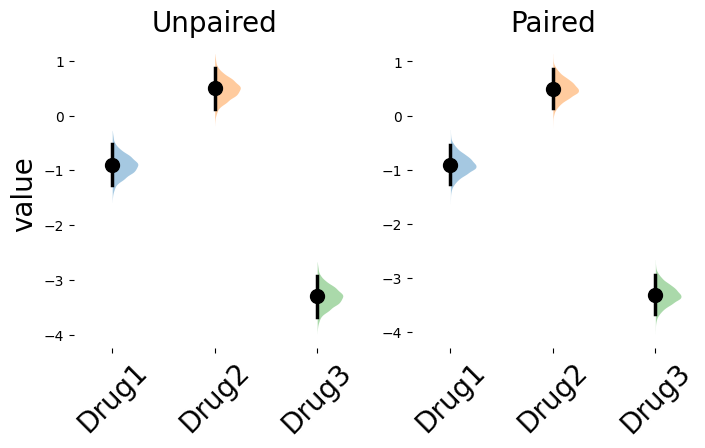

In [ ]:
f_forest_drug_profiles, axes  = plt.subplots(1, 2, figsize = [8, 4])
['Drug1', 'Drug2', 'Drug3']
forest_plot(contrasts, contrast_labels = ['Drug1', 'Drug2', 'Drug3'], ax = axes[0])
forest_plot(paired_contrasts, contrast_labels = ['Drug1', 'Drug2', 'Drug3'], ax = axes[1])
axes[0].set_title('Unpaired', fontsize = 20)
axes[1].set_ylabel('')
axes[1].set_title('Paired', fontsize = 20)


### Four different plots, 3 ``delta delta`` and 1 ``forest plot``

Text(0.0, 1.0, 'Forest plot')

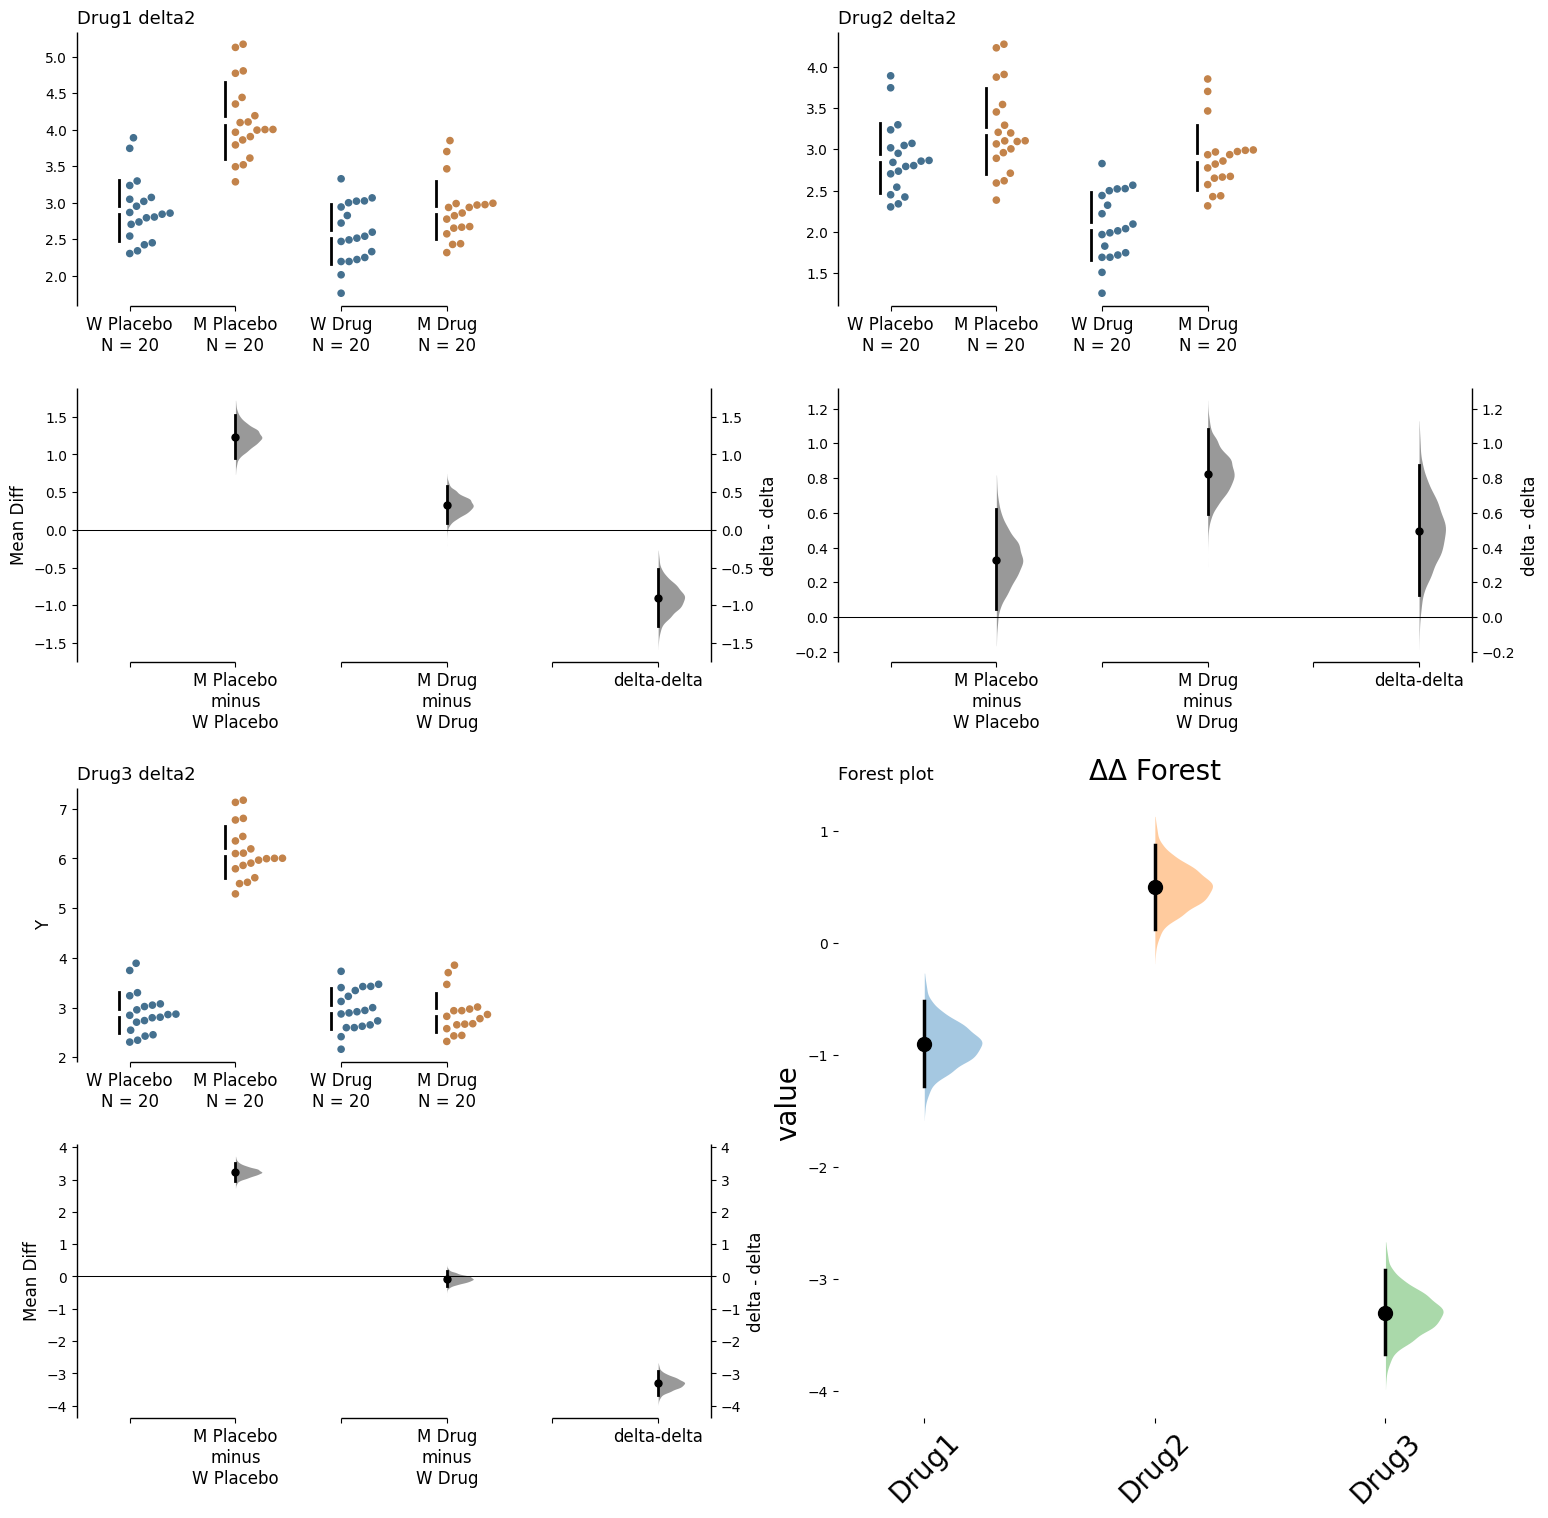

In [ ]:
f_forest_drug_profiles, axes  = plt.subplots(2, 2, figsize=[18, 18])
contrast_labels1 = ['Drug1', 'Drug2', 'Drug3']
unpaired_delta_01.mean_diff.plot(                  
                    contrast_label='Mean Diff',
                    fig_size = (5, 5),
                    raw_marker_size = 5,
                    es_marker_size = 5,
                    color_col='Genotype',
                    ax = axes[0,0]
)

unpaired_delta_02.mean_diff.plot(                  
            contrast_label='',
            fig_size = (5, 5),
            raw_marker_size = 5,
            es_marker_size = 5,
            color_col='Genotype',
            ax = axes[0,1]
)


unpaired_delta_03.mean_diff.plot(                  
                    contrast_label='Mean Diff',
                    fig_size = (5, 5),
                    raw_marker_size = 5,
                    es_marker_size = 5,
                    color_col='Genotype',
                    ax = axes[1,0]
)
forest_plot(contrasts, contrast_labels = contrast_labels1 , ax = axes[1,1])
axes[0,0].set_title('Drug1 delta2', fontsize = 13, loc='left')
axes[0,0].set_ylabel('')
axes[0,1].set_ylabel('')
axes[0,1].set_title('Drug2 delta2', fontsize = 13, loc='left')
axes[1,0].set_title('Drug3 delta2', fontsize = 13, loc='left')
axes[0,1].set_ylabel('')
axes[1,1].set_title('Forest plot', fontsize = 13, loc='left') 

## Forest plot also supports:

### ``mini-meta`` comparisons and with the contrast type changed to ``"mini_meta_delta"``

### Simulate the datasets for unpaired mini_meta 

In [ ]:
def create_mini_meta_dataset(N=20, seed=9999, control_locs=[3, 3.5, 3.25], control_scales=[0.4, 0.75, 0.4], 
                             test_locs=[3.5, 2.5, 3], test_scales=[0.5, 0.6, 0.75]):
    np.random.seed(seed)  # Set the seed for reproducibility

    # Create samples for controls and tests
    controls_tests = []
    for loc, scale in zip(control_locs + test_locs, control_scales + test_scales):
        controls_tests.append(norm.rvs(loc=loc, scale=scale, size=N))

    # Add a `Gender` column for coloring the data
    gender = ['Female'] * (N // 2) + ['Male'] * (N // 2)

    # Add an `ID` column for paired data plotting
    id_col = list(range(1, N + 1))

    # Combine samples and gender into a DataFrame
    df_columns = {f'Control {i+1}': controls_tests[i] for i in range(len(control_locs))}
    df_columns.update({f'Test {i+1}': controls_tests[i + len(control_locs)] for i in range(len(test_locs))})
    df_columns['Gender'] = gender
    df_columns['ID'] = id_col

    df = pd.DataFrame(df_columns)

    return df

# Customizable dataset creation with different arguments
df_mini_meta01 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[3, 3.5, 3.25], 
                                          control_scales=[0.4, 0.75, 0.4], 
                                          test_locs=[3.5, 2.5, 3], 
                                          test_scales=[0.5, 0.6, 0.75])

df_mini_meta02 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[4, 2, 3.25], 
                                          control_scales=[0.3, 0.75, 0.45], 
                                          test_locs=[2, 1.5, 2.75], 
                                          test_scales=[0.5, 0.6, 0.4])

df_mini_meta03 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[6, 5.5, 4.25], 
                                          control_scales=[0.4, 0.75, 0.45], 
                                          test_locs=[4.5, 3.5, 3], 
                                          test_scales=[0.5, 0.6, 0.9])

In [ ]:
contrast_mini_meta01 = dabest.load(data = df_mini_meta01,
                                   idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), 
                                   mini_meta=True)
contrast_mini_meta02 = dabest.load(data = df_mini_meta02,
                                    idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), 
                                    mini_meta=True)
contrast_mini_meta03 = dabest.load(data = df_mini_meta03,
                                   idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")),
                                    mini_meta=True)
contrasts_mini_meta = [contrast_mini_meta01, contrast_mini_meta02, contrast_mini_meta03]    
                              

## Use the contrast list and forest_plot() function to generate figures

### Verticle (default) Layout

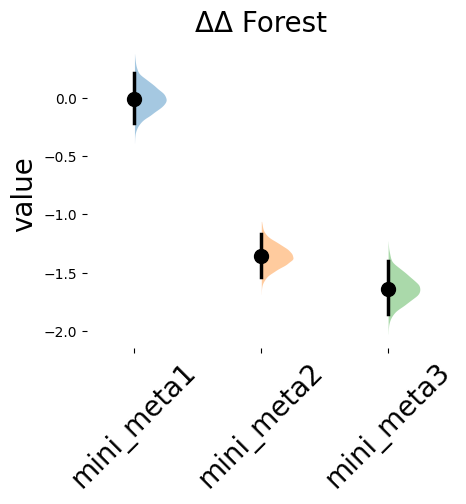

In [ ]:
forest_plot(contrasts_mini_meta, contrast_type='mini_meta', contrast_labels=['mini_meta1', 'mini_meta2', 'mini_meta3']);

### Horizontal Layout

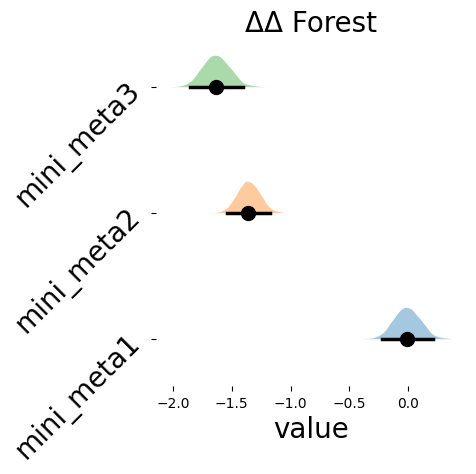

In [ ]:
forest_plot(contrasts_mini_meta, contrast_type='mini_meta', contrast_labels=['mini_meta1', 'mini_meta2', 'mini_meta3'], horizontal=True);
